In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from fbprophet import Prophet
# from fbprophet.diagnostics import cross_validation
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.plot import plot_cross_validation_metric

In [2]:
filename = "../data/data.csv"

In [3]:
df = pd.read_csv(filename)

In [4]:
df.count()

datetime       9047
consumption    9047
dtype: int64

In [5]:
df.head()

,datetime,consumption
0,"12/19/2018, 3:00:02 PM",249.0
1,"12/19/2018, 4:00:03 PM",294.0
2,"12/19/2018, 6:00:02 PM",287.0
3,"12/19/2018, 7:00:02 PM",285.0
4,"12/19/2018, 8:00:02 PM",228.0


### Convert index to datetime

In [6]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

,consumption
datetime,
2018-12-19 15:00:02,249.0
2018-12-19 16:00:03,294.0
2018-12-19 18:00:02,287.0
2018-12-19 19:00:02,285.0
2018-12-19 20:00:02,228.0


### Verify that no value is null

In [7]:
df.isna().sum()

consumption    0
dtype: int64

In [8]:
df['consumption'] = df['consumption'] + 1

In [9]:
min(df.consumption)

1.0

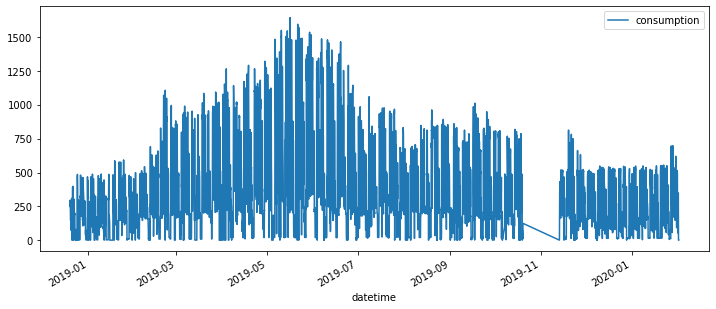

In [10]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [11]:
df.nlargest(10,'consumption')

,consumption
datetime,
2019-05-16 12:00:02,1643.0
2019-05-16 11:00:01,1620.0
2019-05-21 15:00:02,1594.0
2019-05-21 16:00:02,1583.0
2019-05-22 14:00:02,1568.0
2019-05-22 15:00:02,1568.0
2019-05-22 12:00:01,1554.0
2019-05-22 13:00:02,1551.0
2019-05-10 15:00:02,1549.0


In [12]:
df = df.reset_index()

In [13]:
df.count()

datetime       9047
consumption    9047
dtype: int64

## Changing dataframe format specific to Prophet Model

In [14]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [15]:
df.count()

ds    9047
y     9047
dtype: int64

In [16]:
model = Prophet()

In [17]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [18]:
# future = model.make_future_dataframe(periods=365)

In [19]:
# future.head()

In [20]:
prediction=model.predict(df)

In [21]:
prediction.count()

ds                            9047
trend                         9047
yhat_lower                    9047
yhat_upper                    9047
trend_lower                   9047
trend_upper                   9047
additive_terms                9047
additive_terms_lower          9047
additive_terms_upper          9047
daily                         9047
daily_lower                   9047
daily_upper                   9047
weekly                        9047
weekly_lower                  9047
weekly_upper                  9047
multiplicative_terms          9047
multiplicative_terms_lower    9047
multiplicative_terms_upper    9047
yhat                          9047
dtype: int64

In [22]:
prediction.nlargest(10,'trend')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3763,2019-05-27 09:00:02,634.558519,509.098300,991.757476,634.558519,634.558519,116.795051,116.795051,116.795051,142.697121,142.697121,142.697121,-25.902070,-25.902070,-25.902070,0.0,0.0,0.0,751.353570
3762,2019-05-27 08:00:02,634.523891,358.398627,836.037364,634.523891,634.523891,-43.995573,-43.995573,-43.995573,0.371532,0.371532,0.371532,-44.367105,-44.367105,-44.367105,0.0,0.0,0.0,590.528318
3761,2019-05-27 07:00:02,634.489263,174.647928,661.158691,634.489263,634.489263,-203.860802,-203.860802,-203.860802,-140.636187,-140.636187,-140.636187,-63.224615,-63.224615,-63.224615,0.0,0.0,0.0,430.628461
3760,2019-05-27 06:00:02,634.454635,81.212618,568.386012,634.454635,634.454635,-305.375677,-305.375677,-305.375677,-223.026023,-223.026023,-223.026023,-82.349654,-82.349654,-82.349654,0.0,0.0,0.0,329.078957
3764,2019-05-27 10:00:01,634.426938,607.841945,1102.260011,634.426938,634.426938,219.890145,219.890145,219.890145,227.843614,227.843614,227.843614,-7.953469,-7.953469,-7.953469,0.0,0.0,0.0,854.317082
3759,2019-05-27 05:00:02,634.420007,45.792406,540.581669,634.420007,634.420007,-332.961434,-332.961434,-332.961434,-231.348880,-231.348880,-231.348880,-101.612553,-101.612553,-101.612553,0.0,0.0,0.0,301.458573
3758,2019-05-27 04:00:02,634.385379,57.220470,539.423439,634.385379,634.385379,-317.463094,-317.463094,-317.463094,-196.582963,-196.582963,-196.582963,-120.880131,-120.880131,-120.880131,0.0,0.0,0.0,316.922284
3757,2019-05-27 03:00:01,634.350741,90.734386,597.179113,634.350741,634.350741,-304.242709,-304.242709,-304.242709,-164.220457,-164.220457,-164.220457,-140.022251,-140.022251,-140.022251,0.0,0.0,0.0,330.108032
3756,2019-05-27 02:00:02,634.316122,72.025367,562.963436,634.316122,634.316122,-316.068063,-316.068063,-316.068063,-157.181369,-157.181369,-157.181369,-158.886694,-158.886694,-158.886694,0.0,0.0,0.0,318.248060
3765,2019-05-27 11:00:02,634.295283,651.462951,1116.283460,634.295283,634.295283,248.416573,248.416573,248.416573,239.035242,239.035242,239.035242,9.381330,9.381330,9.381330,0.0,0.0,0.0,882.711856


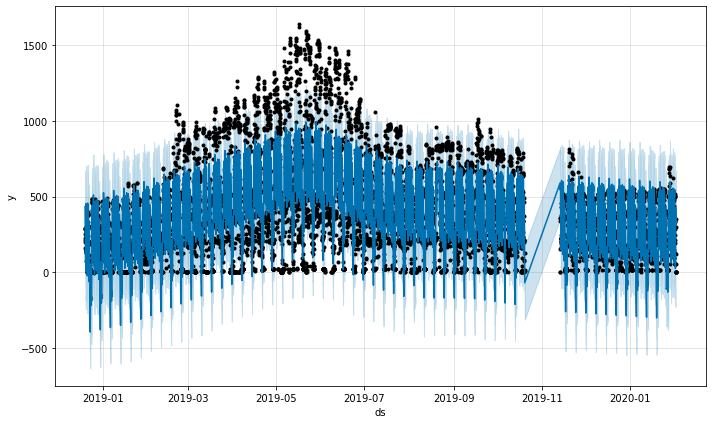

In [23]:
fig = model.plot(prediction)

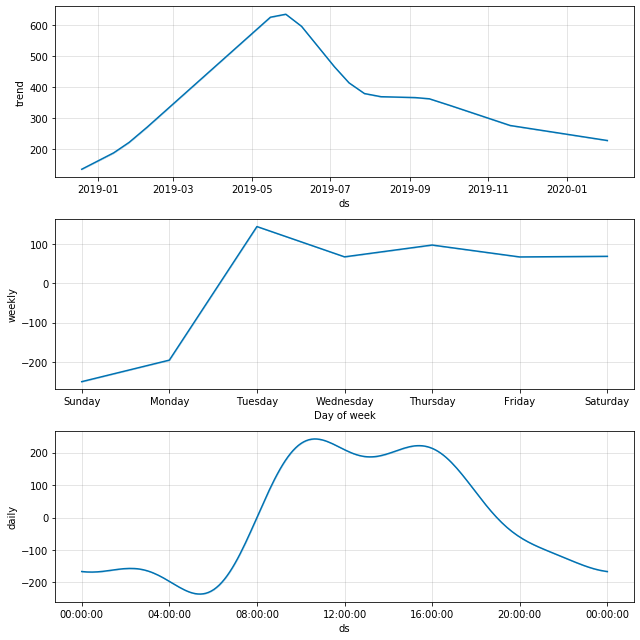

In [24]:
fig = model.plot_components(prediction)

In [25]:
df.head()

,ds,y
0,2018-12-19 15:00:02,250.0
1,2018-12-19 16:00:03,295.0
2,2018-12-19 18:00:02,288.0
3,2018-12-19 19:00:02,286.0
4,2018-12-19 20:00:02,229.0


In [26]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,134.377571,198.997008,669.798067,134.377571,134.377571,299.214336,299.214336,299.214336,218.671367,218.671367,218.671367,80.542969,80.542969,80.542969,0.0,0.0,0.0,433.591907
1,2018-12-19 16:00:03,134.465640,183.084713,659.639798,134.465640,134.465640,296.454380,296.454380,296.454380,213.377333,213.377333,213.377333,83.077047,83.077047,83.077047,0.0,0.0,0.0,430.920020
2,2018-12-19 18:00:02,134.641704,73.791886,554.614049,134.641704,134.641704,165.734614,165.734614,165.734614,77.840920,77.840920,77.840920,87.893694,87.893694,87.893694,0.0,0.0,0.0,300.376318
3,2018-12-19 19:00:02,134.729749,-13.763198,463.281643,134.729749,134.729749,86.716602,86.716602,86.716602,-3.370486,-3.370486,-3.370486,90.087089,90.087089,90.087089,0.0,0.0,0.0,221.446351
4,2018-12-19 20:00:02,134.817793,-71.089136,394.486730,134.817793,134.817793,32.111438,32.111438,32.111438,-59.971335,-59.971335,-59.971335,92.082773,92.082773,92.082773,0.0,0.0,0.0,166.929231


In [27]:
mean_squared_error(y_true=df['y'],y_pred=prediction['yhat'])

36014.836594252891

In [28]:
mean_absolute_error(y_true=df['y'],y_pred=prediction['yhat'])

137.99338834975057

In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=df['y'],y_pred=prediction['yhat'])

1488.6935608081701

In [30]:
df_cv = cross_validation(model, initial='300 days', period='35 days', horizon='70 days')
df_cv.head()

NameError: name 'cross_validation' is not defined

In [ ]:
performance_metrics_results = performance_metrics(df_cv)
print(performance_metrics_results)

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape')